Example lactam analysis using a single cores on a very large dataset.

In [12]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkit.Chem import rdRGroupDecomposition
from rdkit.Chem.rdRGroupDecomposition import RGroupDecomposition
import pandas as pd
from rdkit.Chem import PandasTools
from IPython.display import HTML
from rdkit import rdBase
rdBase.DisableLog("rdApp.debug")

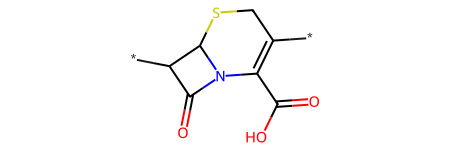

In [2]:
core = Chem.MolFromSmiles('O=C1C([*])C2N1C(C(O)=O)=C([*])CS2')
core

To use RGroupDecomposition:
  
  1. construct the class on the core rg = RGroupDecomposition(core)
  2. Call rg.Add( mol ) on the molecules.  If this returns -1, the molecule is not
     compatible with the core
  3. After all molecules are added, call rg.Process() to complete the rgroup
     decomposition.

In [21]:
ps = rdRGroupDecomposition.RGroupDecompositionParameters()
ps.rgroupLabelling = rdRGroupDecomposition.RGroupLabelling.MDLRGroup
rg = RGroupDecomposition(core,ps)

mols = []
count = 0
for line in open("compounds.txt"):
    sm = line.split()[-1]
    m = Chem.MolFromSmiles(sm)
    if m:
        count += 1
        mols.append(m)
        idx = rg.Add(m)
rg.Process()
print ("Added %s to RGroup Decomposition out of %s"%(idx, count))

Added 1194 to RGroup Decomposition out of 4340


It is useful to disable logging here.  When making RGroup renderings there 
are a lot of sanitization warnings.

In [4]:
from rdkit import RDLogger
RDLogger.DisableLog("rdApp.*")

The RGroupDecomposition code is quite compatible with the python pandas integration.
Calling rg.GetRGroupsAsColumns() can be sent directly into a pandas table.

**n.b.** You need to call PandasTools.ChangeMoleculeRendering(frame) to allow the molecules
to be rendered properly.

,Core,R1,R2
0,,,
1,,,
2,,,
3,,,
4,,,
5,,,
6,,,
7,,,
8,,,
9,,,

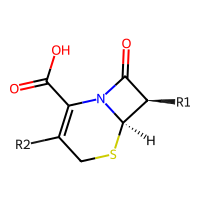
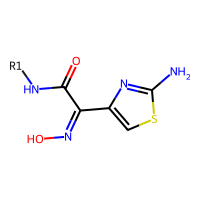
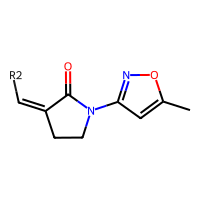
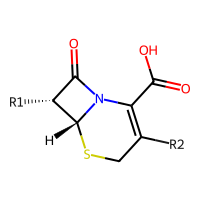
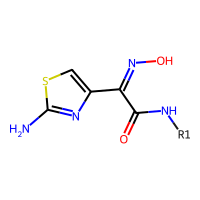
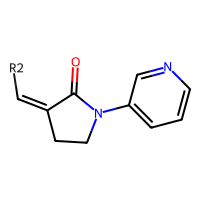
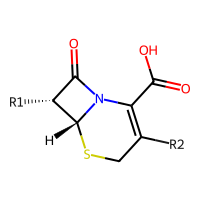
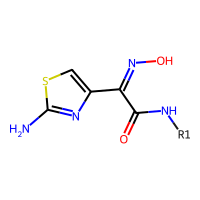
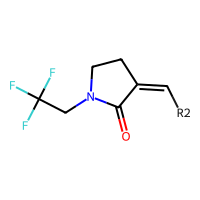
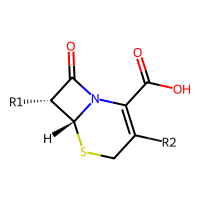
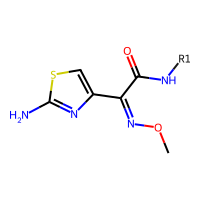
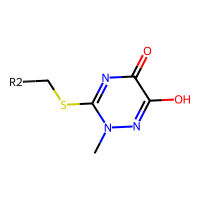
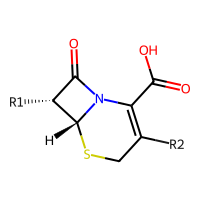
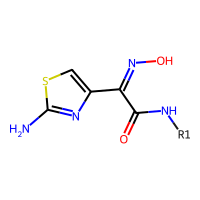
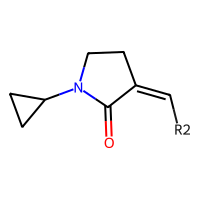
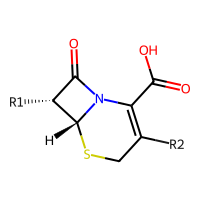
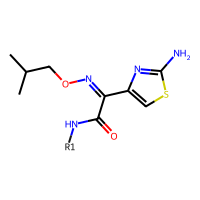
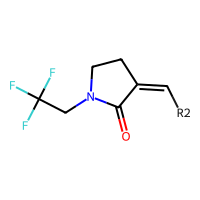
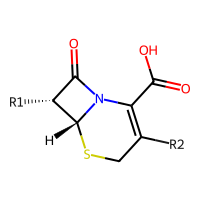
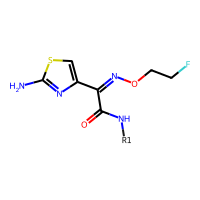
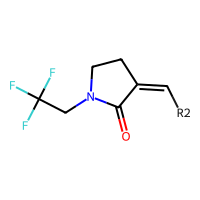
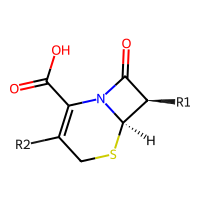
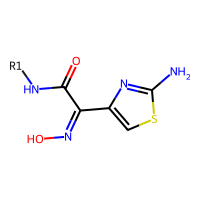
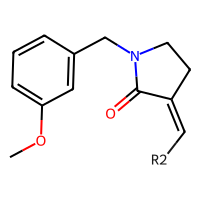
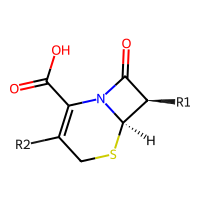
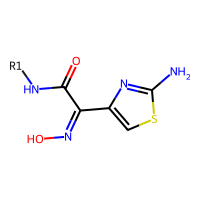
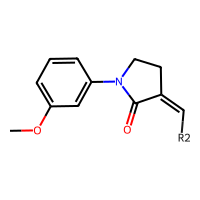
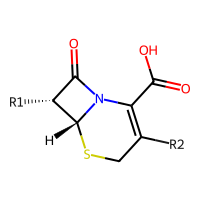
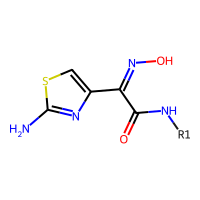
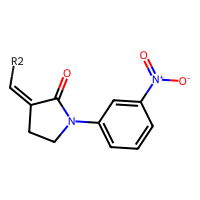
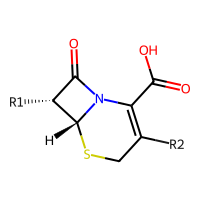
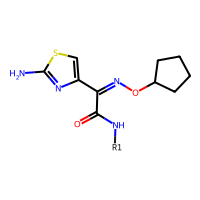
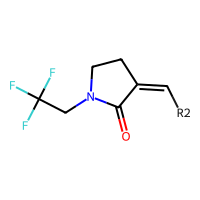

In [20]:
from rdkit.Chem import Draw
ps = rdRGroupDecomposition.RGroupDecompositionParameters()
ps.rgroupLabelling = rdRGroupDecomposition.RGroupLabelling.MDLRGroup
rg = RGroupDecomposition(core,ps)

idx = 0
for m in mols:
    idx = rg.Add(m)
    if idx>=10:
        break
rg.Process()
cols = rg.GetRGroupsAsColumns()
#Draw.MolsToGridImage(cols['R1'])
frame = pd.DataFrame(cols)
PandasTools.ChangeMoleculeRendering(frame)
frame

In [24]:
r1s = [Chem.MolToCXSmiles(x) for x in cols['R1']]
r1s

['*NC(=O)/C(=N\\O)c1csc(N)n1 |atomProp:0.dummyLabel.R1|',
 '*NC(=O)/C(=N\\O)c1csc(N)n1 |atomProp:0.dummyLabel.R1|',
 '*NC(=O)/C(=N\\O)c1csc(N)n1 |atomProp:0.dummyLabel.R1|',
 '*NC(=O)/C(=N\\OC)c1csc(N)n1 |atomProp:0.dummyLabel.R1|',
 '*NC(=O)/C(=N\\O)c1csc(N)n1 |atomProp:0.dummyLabel.R1|',
 '*NC(=O)/C(=N\\OCC(C)C)c1csc(N)n1 |atomProp:0.dummyLabel.R1|',
 '*NC(=O)/C(=N\\OCCF)c1csc(N)n1 |atomProp:0.dummyLabel.R1|',
 '*NC(=O)/C(=N\\O)c1csc(N)n1 |atomProp:0.dummyLabel.R1|',
 '*NC(=O)/C(=N\\O)c1csc(N)n1 |atomProp:0.dummyLabel.R1|',
 '*NC(=O)/C(=N\\O)c1csc(N)n1 |atomProp:0.dummyLabel.R1|',
 '*NC(=O)/C(=N\\OC1CCCC1)c1csc(N)n1 |atomProp:0.dummyLabel.R1|']

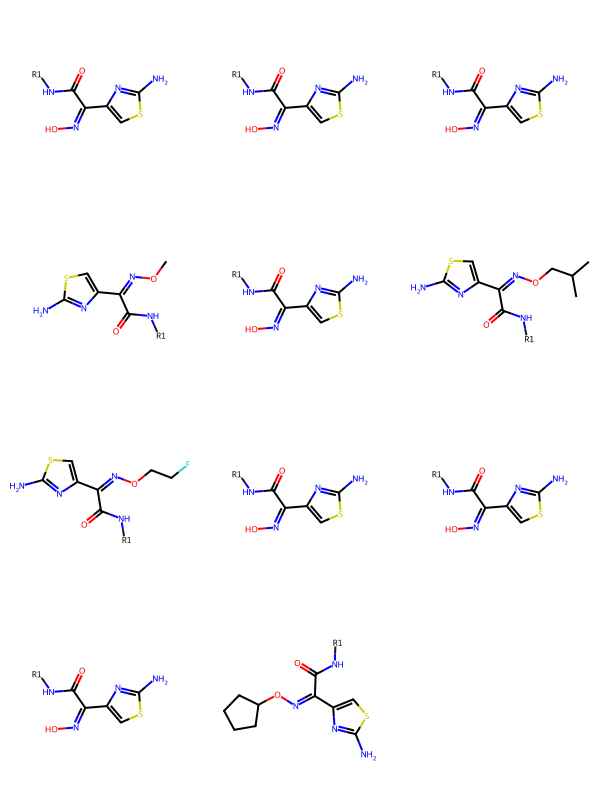

In [25]:
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in r1s])

In [5]:
frame = pd.DataFrame(rg.GetRGroupsAsColumns())
PandasTools.ChangeMoleculeRendering(frame)

Just show the first few (for speed and to keep the notebook small)

,Core,R1,R2,R3,R4,R5
0,,,,,,
1,,,,,,
2,,,,,,
3,,,,,,
4,,,,,,

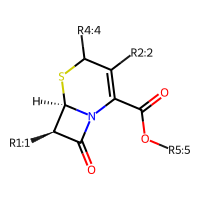
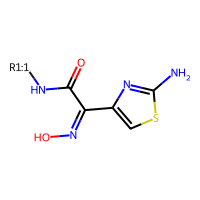
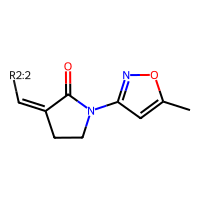
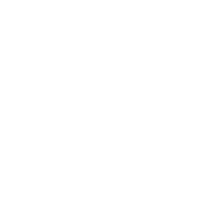
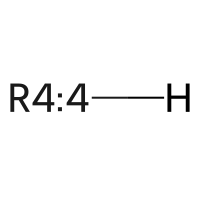
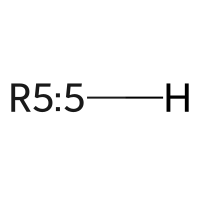
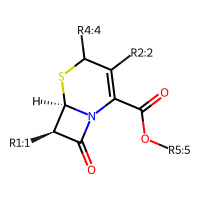
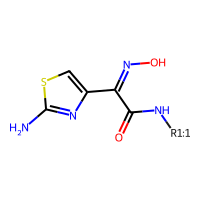
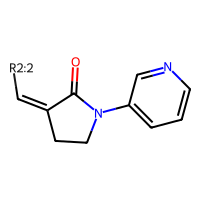
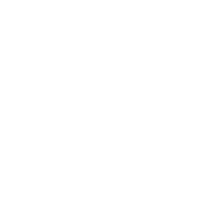
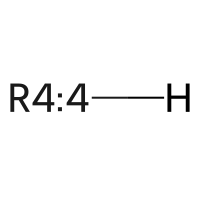
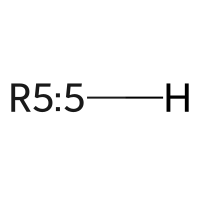
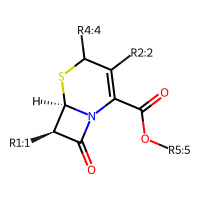
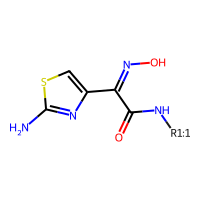
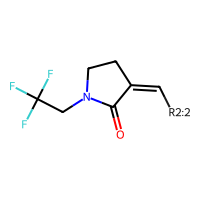
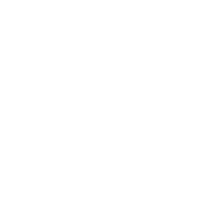
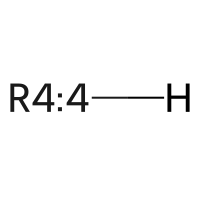
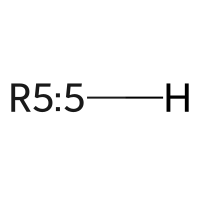
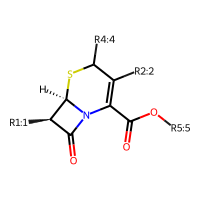
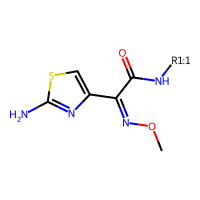
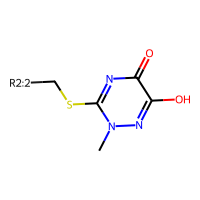
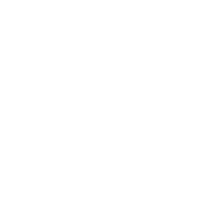
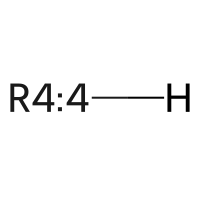
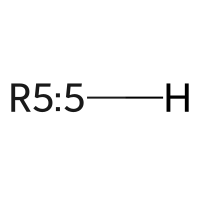
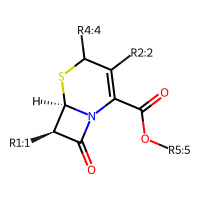
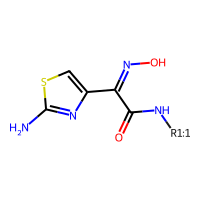
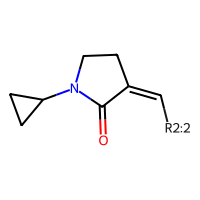
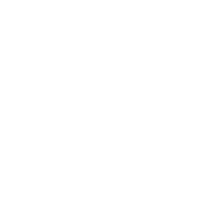
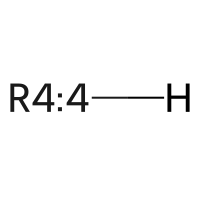
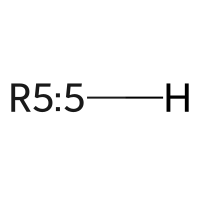

In [6]:
f2 = pd.DataFrame(frame.head())
PandasTools.ChangeMoleculeRendering(f2)
HTML(f2.to_html())